In [312]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [313]:
#Import data
data = pd.read_csv("Sales_LR.csv")
data

,Year,Sales
0,2013,47.520
1,2013,81.384
2,2014,2495.376
3,2015,61077.636
4,2014,63309.528
...,...,...
103,2022,199405.740
104,2022,200604.240
105,2022,200993.460
106,2022,202159.740


In [314]:
# Identify duplicate entries
duplicates = data.duplicated(subset='Year', keep=False)
# get mean sales for duplicate years 
aggregated_data = data.groupby('Year')['Sales'].mean().reset_index()
# Remove duplicate year entries
cleaned_data = data[~duplicates]
# Merge data
final_data = pd.concat([cleaned_data, aggregated_data])
# Sort according to year
final_data = final_data.sort_values('Year')
# Print the cleaned and aggregated data
print(final_data)

   Year       Sales
0  2013      64.452
1  2014   65345.309
2  2015   72473.177
3  2016   79708.587
4  2017   97240.715
5  2018  102657.970
6  2019  117128.750
7  2020  131857.580
8  2021  154069.830
9  2022  194525.850


In [320]:
# Create the features and target variables
year = final_data[["Year"]].values.reshape(-1, 1)
sales = final_data[["Sales"]].values.reshape(-1, 1)
print(year)
print(sales)

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]]
[[6.4452000e+01]
 [6.5345309e+04]
 [7.2473177e+04]
 [7.9708587e+04]
 [9.7240715e+04]
 [1.0265797e+05]
 [1.1712875e+05]
 [1.3185758e+05]
 [1.5406983e+05]
 [1.9452585e+05]]


In [319]:
model = LinearRegression()
model
model.fit(year, sales)

LinearRegression()

In [321]:
#predict sales
new_data = pd.DataFrame({'Year': [2016,2017,2019,2024,2025,2023,2022,2020,2026,2027]}).values.reshape(-1,1) 
prediction = model.predict(new_data)
df = pd.DataFrame({'Year': new_data.flatten(), 'Predicted Sales': prediction.flatten()})
print(df)

# print("Sales prediction for year")
# print(prediction)

   Year  Predicted Sales
0  2016     76181.549382
1  2017     93065.331127
2  2019    126832.894618
3  2024    211251.803345
4  2025    228135.585091
5  2023    194368.021600
6  2022    177484.239855
7  2020    143716.676364
8  2026    245019.366836
9  2027    261903.148582


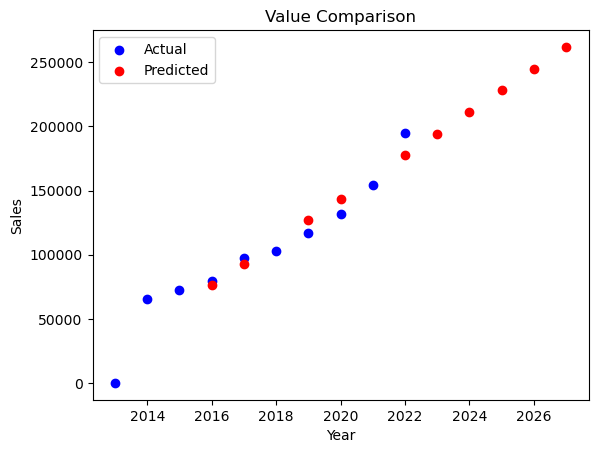

R2 Score: 
0.9216643173690003
MS Error: 
199885028.21835923


In [318]:
# actual values and the predicted values
plt.scatter(year, sales, color='blue', label='Actual')
plt.scatter(new_data, prediction, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Value Comparison')
plt.legend()
plt.show()
y_pred =model.predict(year)
r2 = r2_score(sales, y_pred)
mse = mean_squared_error(sales, y_pred)
print('R2 Score: ')
print(r2)
print('MS Error: ')
print(mse)